# Prediction using Supervised ML

**Objective:** Predicting the percentage of Marks of an student based on the no. of study hours, using a simple linear regression model..

### <font color=Blue> Author: Mayank Gupta </font>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## 1: Reading and Understanding the Data

In [2]:
# Reading the data
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Inspecting the dataframe
print("*********************************  Info *******************************************") 
print(df.info())
print("*********************************  Shape ******************************************") 
print(df.shape)
print("***************************** Null value percentage *******************************")
print(df.isnull().mean() * 100)
print("********************************* Describe ****************************************")
df.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
*********************************  Shape ******************************************
(25, 2)
***************************** Null value percentage *******************************
Hours     0.0
Scores    0.0
dtype: float64
********************************* Describe ****************************************


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2: Visualising the Data

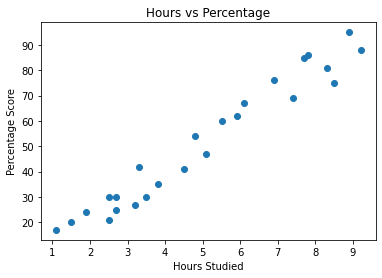

In [4]:
# Scatter plot for hours vs scale
plt.scatter(data = df , x = 'Hours', y = 'Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

`Infrences:` From the above plot we can conclude that `Hours` & `Scores` are positively corelated. The increase in `Hours` results in increase `Scores`

## 3: Performing Simple Linear Regression

***Splitting the dataset***

In [5]:
X= df.Hours
y= df.Scores

In [6]:
from sklearn.model_selection import train_test_split

***Train-Test Split***

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

In [8]:
X_train.shape

(20,)

***When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.***

In [9]:
# Resahping the dataset
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


***Building & Training a Linear Model***

In [11]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)
print("---------Training Executed---------")

---------Training Executed---------


In [12]:
print(lm.intercept_)
print(lm.coef_)

1.9894231109746912
[9.83544438]


The equation for predicting the Score is:

<font color=red> $ Score = 1.9894 + 9.8354* Hours $ </font>

***Visualizing the fit on the train set***

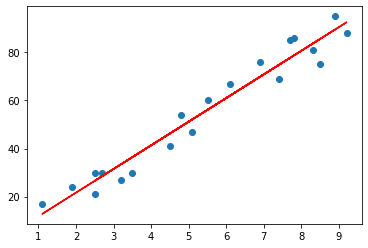

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.9894 + 9.8354*X_train, 'r')
plt.show()

## Making Predictions

In [14]:
y_pred = lm.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,2.7,28.545123
1,3.8,39.364112
2,3.3,34.446390
3,5.9,60.018545
4,1.5,16.742590


***Comapiring Actual Marks with Predicted Marks***

In [15]:
df1 = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})  
df1

,Actual Marks,Predicted Marks
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


## Evaluating the Model

***Prediting the score if student studies for 9.25 Hrs/Day***

In [16]:
hours = [9.25]
predciton = lm.predict([hours])
print("Hours = {}".format(hours[0]))
print("Score = {}".format(round(predciton[0],2)))

Hours = 9.25
Score = 92.97


***As per the model if a student studies for 9.25 hours a day student is likely to score 92.97 marks.***

***Checking*** `Mean absolute error`

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.140342096254413


***Our Models's Mean absolute error is having small value so it states that the chances of error/wrong predictions are very less.***

### <font color=silver> This project is only for educational purpose under **Graduate Rotational Internship Program** by **The Sparks Foundation**</font>